### Milestone 1 - Instructions
Assume the 591 attributes represent different sensors readings across the manufacturing process. 

Using the SECOM dataset, create a new notebook, and perform each of the following tasks and answer the related questions:

Refine your data understanding and prepare a DFD of solving the manufacturing quality problem
- Read and merge data
- Clean and prepare data
- Visually explore data
- Handle class imbalance problem
- Apply feature selection techniques to reduce dimensionality of data
- Describe your initial findings in a summary section
- Solicit specific feedback on your code (instructions below).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
import seaborn as sns
from sklearn.metrics import mutual_info_score

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: F

In [2]:
pd.set_option('display.max_columns', 200)

### Read in data

In [3]:
# assign url variable where we will pull data from
url_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [4]:
# add generic feature column names
names = ["feature" + str(x) for x in range(1, 591)]

In [5]:
# pull down the csv info into a pandas dataframe
data = pd.read_csv(url_data, sep=" ", names=names, header=None, dtype=None)

In [6]:
#check head of data 
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,...,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature499,feature500,feature501,feature502,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512,feature513,feature514,feature515,feature516,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,48.2091,0.7578,NaN,2.9570,2.1739,10.0261,17.1202,22.3756,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.6707,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1695,0.0,4.590,4.842,2853.0,0.9324,0.9479,4.6820,0.8073,352.0073,10.3092,113.9800,10.9036,19.1927,27.6301,697.1964,1.1598,154.3709,1.0,620.3582,82.3494,NaN,NaN,0.0,-0.0039,-0.0198,0.0004,-

In [7]:
# assign url variable where we will pull classification data from
url_classifications = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [8]:
# assign classification and date to labels
labels = pd.read_csv(url_classifications, sep=" ", names = ["classification","date"],parse_dates = ["date"])

### Merge data

In [9]:
# merge data with classification labels
df = pd.concat([data,labels], axis=1)

In [10]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,...,feature493,feature494,feature495,feature496,feature497,feature498,feature499,feature500,feature501,feature502,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512,feature513,feature514,feature515,feature516,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification,date
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,...,NaN,2.9570,2.1739,10.0261,17.1202,22.3756,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.6707,0.0000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,70.0,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,1.0,631.2618,205.1695,0.0,4.590,4.842,2853.0,0.9324,0.9479,4.6820,0.8073,352.0073,10.3092,113.9800,10.9036,19.1927,27.6301,697.1964,1.1598,154.3709,1.0,620.3582,82.3494,NaN,NaN,0.0,-0.0039,-0.0198,0.

#### Understand the data set

In [11]:
# get length of dataframe
len(df)

1567

In [12]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,...,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature499,feature500,feature501,feature502,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512,feature513,feature514,feature515,feature516,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature529,feature530,feature531,feature532,feature533,feature534,feature535,feature536,feature537,feature538,feature539,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1543.000000,1543.000000,1566.0,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.000000,1566.000000,1566.0,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1560.000000,1561.000000,1561.000000,1561.000000,1560.000000,1560.000000,1560.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.000000,773.000000,773.000000,1561.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1566.000000,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.00000,...,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.0,1565.000000,1565.000000,1561.0,1561.0,1561.0,1561.0,1561.0,1561.0,1561.0,1561.0,1561.0,1565.000000,1565.000000,1561.0,1561.0,1561.0,1561.0,549.000000,549.000000,549.000000,852.00000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1543.000000,1567.000000,1567.000000,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1558.0,1559.000000,1559.000000,1559.000000,1565.000000,1565.000000,1565.000000,1565.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1566.000000,1566.000000,1566.000000,1566.000000,1294.00

In [13]:
#count number of columns by datatype
df.dtypes.value_counts()

float64           590
int64               1
datetime64[ns]      1
dtype: int64

### Clean and prepare data

According to dataset information this data contains null values varying in intensity depending on the individuals features. 

The data is represented in a raw text file each line representing an individual example and the features seperated by spaces. The null values are represented by the 'NaN' value as per MatLab.

In [14]:
#replace missing values with median values
df.fillna(data.median(), inplace=True)

In [15]:
print(df.isnull().sum())

feature1          0
feature2          0
feature3          0
feature4          0
feature5          0
                 ..
feature588        0
feature589        0
feature590        0
classification    0
date              0
Length: 592, dtype: int64


In [16]:
# drop the date column
df = df.drop(['date'], axis=1)

In [17]:
# remove all columns with 0 std 
df = df.loc[:, df.std() > .0]

### Explore data

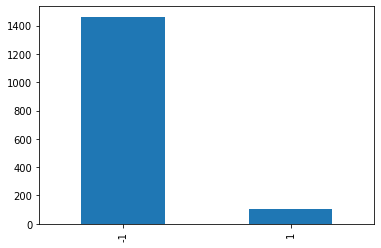

In [18]:
df['classification'].value_counts().plot(kind = 'bar')

### Handle class imbalance problem

#### Define predicators and target

X = All features minus the target, column "classification"

y = classification - simple pass/fail yield for in house line testing

In [19]:
# define X 
X = df.drop('classification', axis=1)

# define y
y = df['classification']

In [20]:
# use SMOTE to resample data from X, y
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({-1: 1463, 1: 1463})


In [21]:
# combine resampled x and y into new dataframe
resampled = pd.DataFrame(X_res, columns=X.columns)

resampled['classification'] = y_res

In [22]:
resampled.head()

,feature1,feature2,feature3,feature4,feature5,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature44,feature45,feature46,feature47,feature48,feature49,feature51,feature52,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,...,feature460,feature461,feature468,feature469,feature470,feature471,feature472,feature473,feature474,feature475,feature476,feature477,feature478,feature479,feature480,feature481,feature483,feature484,feature485,feature486,feature487,feature488,feature489,feature490,feature491,feature492,feature493,feature494,feature495,feature496,feature497,feature498,feature500,feature501,feature511,feature512,feature517,feature518,feature519,feature520,feature521,feature522,feature523,feature524,feature525,feature526,feature527,feature528,feature540,feature541,feature542,feature543,feature544,feature545,feature546,feature547,feature548,feature549,feature550,feature551,feature552,feature553,feature554,feature555,feature556,feature557,feature558,feature559,feature560,feature561,feature562,feature563,feature564,feature565,feature566,feature567,feature568,feature569,feature570,feature571,feature572,feature573,feature574,feature575,feature576,feature577,feature578,feature579,feature580,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,classification
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,624.3145,218.3174,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,608.1700,84.0793,152.2972,466.0817,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,0.11355,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,...,1.7924,29.9394,6.2052,311.6377,5.7277,2.7864,9.7752,63.7987,24.7625,13.6778,2.3394,31.9893,5.8142,0.0,1.6936,115.7408,613.3069,291.4842,494.6996,178.1759,843.1138,0.0000,53.1098,0.0000,48.2091,0.7578,8.00895,2.9570,2.1739,10.0261,17.1202,22.3756,0.0000,0.0000,64.6707,0.0000,0.1747,1.1543,1.5891,5.83295,1.9864,0.0,29.3804,0.1094,4.8560,3.1406,0.5064,6.6926,2.0570,4.0825,11.5074,0.1096,0.0078,0.0026,7.116,1.0616,395.570,75.752,0.4234,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,264.272,0.6510,5.16,0.11955,2.15045,0.04865,1.9997,16.98835,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.0204,0.0148,0.0047,72.2889,0.5005,0.0118,0.0035,2.3630,0.0205,0.0148,0.0046,71.9005,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,352.2445,10.0373,133.1727,724.8264,1.2887,145.8445,631.2618,205.169

In [42]:
# redefine X 
X = resampled.drop('classification', axis=1)

# redefine y
Y = resampled['classification']

### Apply feature selection techniques to reduce dimensionality of data

### Filter methods

In [28]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

mi = X.apply(calc_MI, axis=0, y=y, bins=20)

In [29]:
# print mutual information scores

d = []
for feature, mi_value in mi.iteritems():
    if mi_value >.05:
        d.append({'feature': feature, 'mi score': mi_value})
        
d = pd.DataFrame(d)
d.sort_values(by=['mi score'], ascending=0)

,feature,mi score
5,feature41,0.115876
8,feature60,0.097015
26,feature564,0.078681
9,feature104,0.078478
24,feature512,0.071977
20,feature420,0.071250
13,feature125,0.070590
18,feature248,0.067456
10,feature117,0.067214
23,feature511,0.066239


In [30]:
d['feature']

0       feature9
1      feature28
2      feature29
3      feature32
4      feature34
5      feature41
6      feature48
7      feature59
8      feature60
9     feature104
10    feature117
11    feature122
12    feature123
13    feature125
14    feature127
15    feature128
16    feature130
17    feature131
18    feature248
19    feature279
20    feature420
21    feature487
22    feature501
23    feature511
24    feature512
25    feature520
26    feature564
Name: feature, dtype: object

In [31]:
feature_list = ['feature9',
                'feature28',
                'feature29',
                'feature32',
                'feature34',
                'feature41',
                'feature48',
                'feature59',
                'feature60',
                'feature104',
                'feature117',
                'feature122',
                'feature123',
                'feature125',
                'feature127',
                'feature128',
                'feature130',
                'feature131',
                'feature248',
                'feature279',
                'feature420',
                'feature487',
                'feature501',
                'feature511',
                'feature512',
                'feature520',
                'feature564']

In [36]:
X = resampled[feature_list]

In [40]:
from sklearn.model_selection import train_test_split

In [43]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [44]:
from sklearn.tree import DecisionTreeClassifier 

# Use entropy = no limit on samples for split
model_ent = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train) 
y_ent_pred = model_ent.predict(X_test)

# Use information gain (default) limit min_samples to 4
model_gini = DecisionTreeClassifier(min_samples_leaf=10,max_depth=5).fit(X_train, y_train)
y_gini_pred = model_gini.predict(X_test)

In [45]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))

Entropy accuracy is : 91.97952218430035%
Gini accuracy is : 85.83617747440273%


In [46]:
from sklearn import tree

# assign features names
columns = list(X.columns.values)


#create a visualization of the tree
dotfile1 = open("bc_ent.dot", 'w')
tree.export_graphviz(model_ent, out_file = dotfile1, filled=True, rounded=True, feature_names = columns) #columns[0:8]
dotfile1.close()

# Convert the dot file to a png
from subprocess import check_call
check_call(['dot','-Tpng','bc_ent.dot','-o','bc_ent.png'])

0

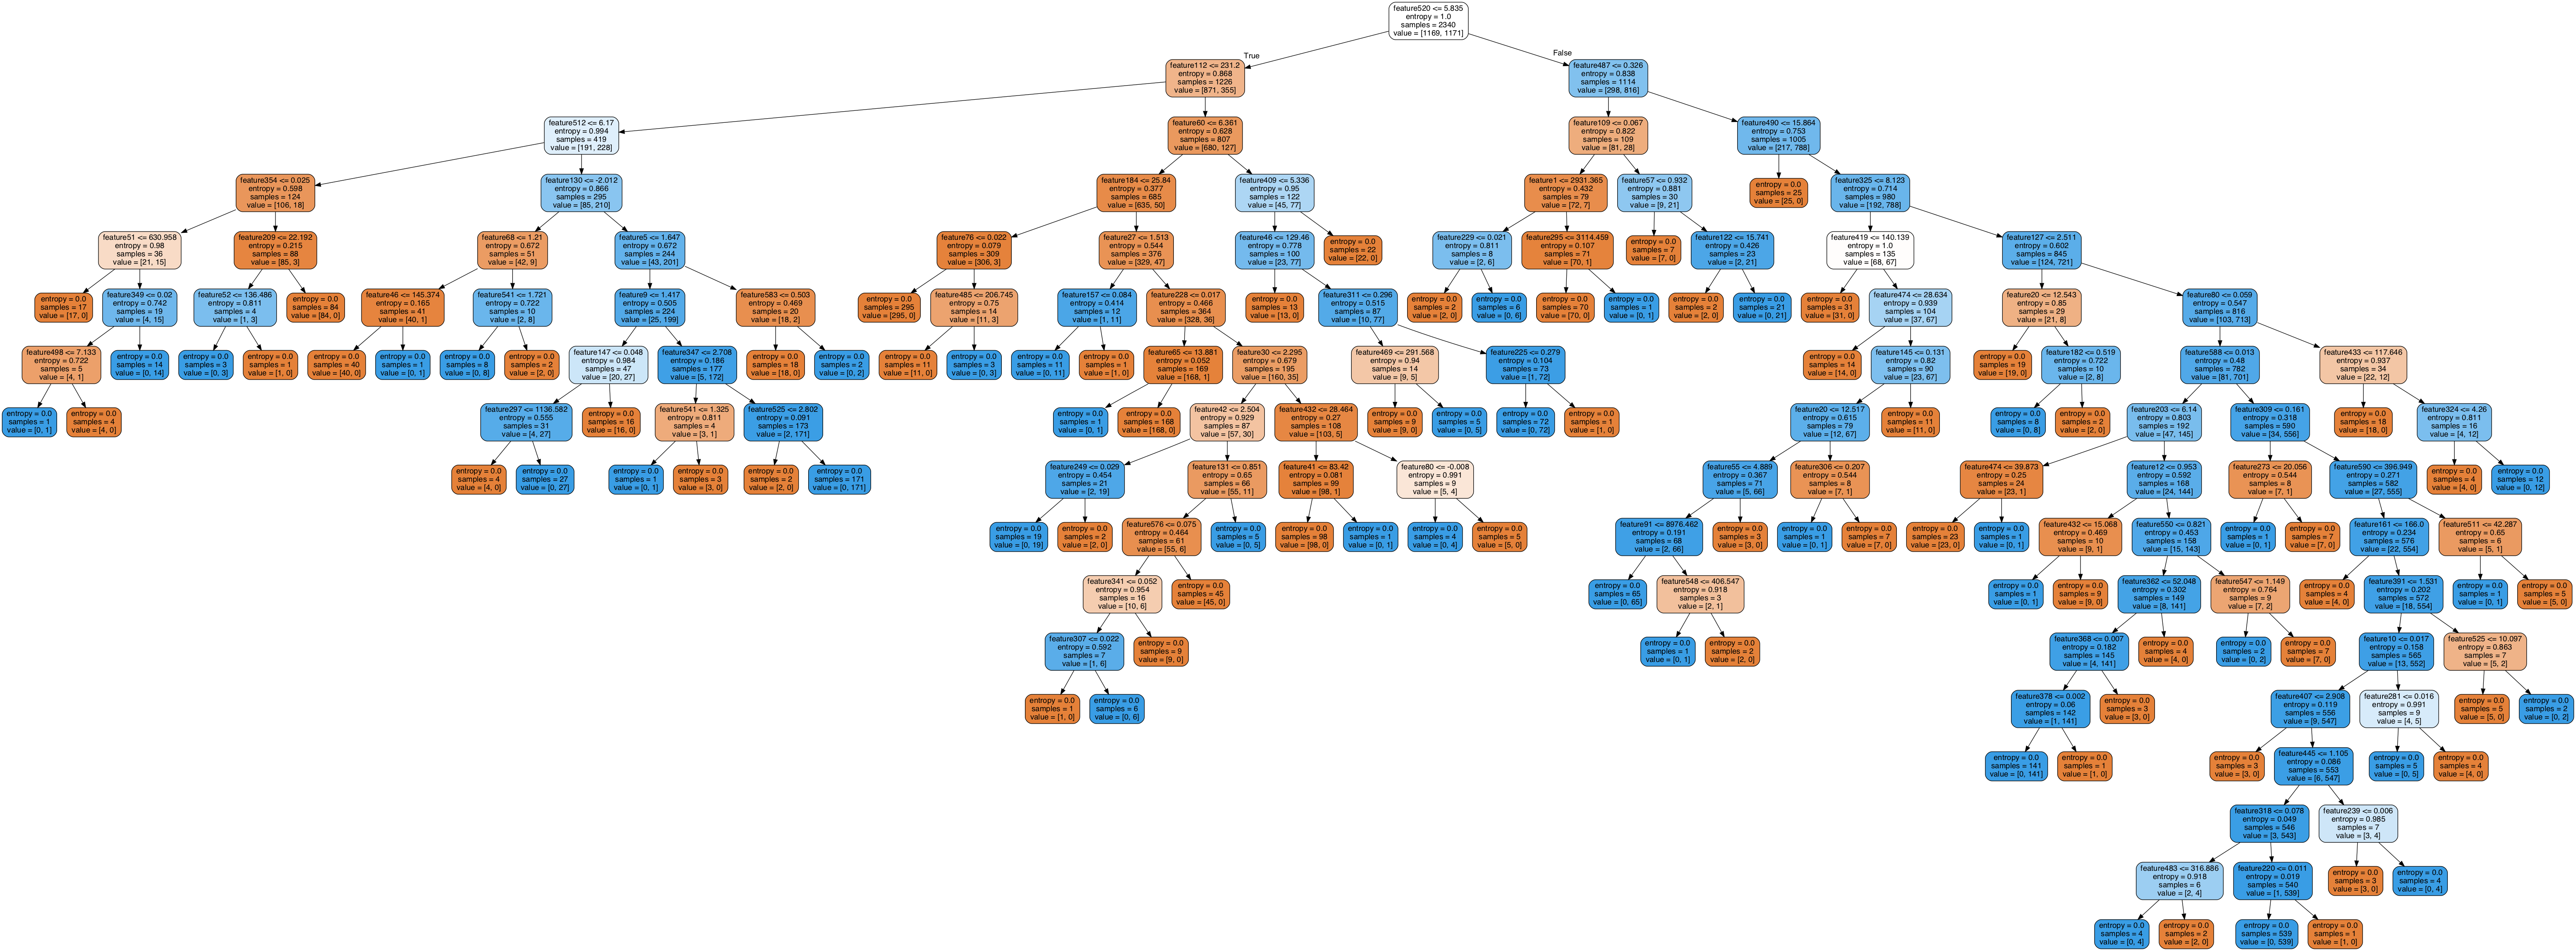

In [47]:
from IPython.display import Image
Image(filename='bc_ent.png', width=1500, height=1500)

In [48]:
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

[1.16513720e-03 3.80290873e-05 5.83838526e-04 3.03006776e-04
 7.24692721e-04 8.84938322e-04 0.00000000e+00 4.27500825e-03
 2.86753926e-04 4.91811538e-04 1.83945246e-03 4.77684699e-04
 3.87088864e-04 6.71390925e-04 9.72416763e-04 1.33379915e-04
 3.77988298e-05 2.00076128e-03 5.36801199e-04 5.89560509e-03
 9.36266299e-04 2.67631379e-04 4.29950434e-04 7.77883303e-04
 7.23946626e-04 5.33418246e-04 5.77711104e-03 3.78487109e-04
 3.35017654e-04 4.71223741e-03 3.87438362e-03 9.90014655e-03
 1.00773185e-03 5.24770340e-04 7.06660342e-04 7.75917125e-04
 3.03484556e-04 5.60788710e-04 2.41632894e-02 2.11595645e-03
 1.99574668e-03 8.28387463e-04 8.52559253e-04 7.46346957e-04
 1.01073123e-04 7.96647414e-04 5.19813401e-04 3.63497297e-04
 1.39366192e-03 1.65354603e-04 7.10273732e-04 2.42965202e-03
 5.06731349e-04 5.91661514e-03 2.82513953e-02 6.93339021e-05
 7.45517401e-04 7.46603757e-05 6.52765001e-04 3.07746479e-03
 2.23045967e-03 5.15176896e-04 9.41318106e-04 3.85317565e-04
 9.32505503e-04 4.354101

In [49]:
# Generate an accuracy Score
from sklearn.metrics import accuracy_score

Y_test_hat = clf.predict(X_test)

print("Accuracy is : {}%".format(accuracy_score(y_test, Y_test_hat)*100))

Accuracy is : 93.1740614334471%


In [50]:
cost = 1 # penalty parameter of the error term
gamma = 5 # defines the influence of input vectors on the margins

In [53]:
from sklearn import svm, metrics
from sklearn.metrics import classification_report

# Train a LinearSVC
clf1 = svm.LinearSVC(C=cost).fit(X_train, y_train)
clf1.predict(X_test)
print("LinearSVC")
print(classification_report(clf1.predict(X_test), y_test))

# Test linear, rbf and poly kernels
for k in ('linear', 'rbf', 'poly'):
    clf = svm.SVC(gamma=gamma, kernel=k, C=cost, max_iter=20000).fit(X_train, y_train)
    clf.predict(X_test)
    print(k)
    print(classification_report(clf.predict(X_test), y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
              precision    recall  f1-score   support

          -1       0.31      0.87      0.45       103
           1       0.96      0.58      0.72       483

    accuracy                           0.63       586
   macro avg       0.63      0.73      0.59       586
weighted avg       0.84      0.63      0.67       586



/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


linear
              precision    recall  f1-score   support

          -1       0.30      0.63      0.40       138
           1       0.83      0.54      0.65       448

    accuracy                           0.56       586
   macro avg       0.56      0.58      0.53       586
weighted avg       0.70      0.56      0.59       586

rbf


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       1.00      0.50      0.67       586

    accuracy                           0.50       586
   macro avg       0.50      0.25      0.33       586
weighted avg       1.00      0.50      0.67       586



/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


poly
              precision    recall  f1-score   support

          -1       0.83      0.93      0.88       264
           1       0.93      0.85      0.89       322

    accuracy                           0.88       586
   macro avg       0.88      0.89      0.88       586
weighted avg       0.89      0.88      0.88       586



### Stepwise Model Selection

#### Backward model selection

In [ ]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
selector = RFE(estimator, 130, step=1)#select features. Step=1 means each step only remove 1 variable from the model
selector = selector.fit(X, y)
print(selector.support_) # The mask of selected features.
print(selector.ranking_) # selected features are ranked 1. The 6th is the one that is removed first,
                         # 2nd is the one that is removed last

In [ ]:
# select features and assign to list
feature_index = selector.get_support(True)
topfeatures = feature_index.tolist()

In [ ]:
colname = data.columns[topfeatures]
print (colname)

#### Forward Stepwise Feature Selection


In [ ]:
# I decreased k_features to 20 for sharing; however, on previous run I found that at ~130 
# k_features performance reached a plateau.

In [ ]:
# Forward Stepwise Feature Selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


lr = LinearRegression()

sfs = SFS(lr, 
          k_features=20, # k_features has to be smaller or equal to the number of features. If equal to, it starts from
                         # intercept to the full model
          forward=True,  # forward
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(25,10))

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
sfs.get_metric_dict()[20]

#### LASSO

In [ ]:
# LASSO
from sklearn import linear_model

alpha = 1 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)

print(clf.intercept_)

In [ ]:
coeff_lasso = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coeff_lasso.columns = ['feature', 'coeff']

In [ ]:
coeff_lasso.sort_values(by='coeff', ascending=0)[:20]

#### Ridge Regression

In [ ]:
# Ridge Regression
from sklearn import linear_model
alpha = 500 
clf = linear_model.Ridge(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)

print(clf.intercept_)

import numpy as np
# Increasing alpha can compress the L2 norm of the coefficients to 0 (but not selecting variables)
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

In [ ]:
coeff_ridge = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)
coeff_ridge.columns = ['feature', 'coeff']

In [ ]:
coeff_ridge.sort_values(by='coeff', ascending=0)[:20]

### Initial Findings

While each feature selection produced different results, there were some common features that appeared.
The most common feature across methods was feature60, which had high scores for correlation, mutual information,
and Lasso. It featured using the other methods as well. 

Other features which appeared across multiple methods were feature511, feature104, feature130, feature65, and feature41.

Other features received high scores in one method; however, did not seem to appear in others including feature349, feature407, feature564.

##### Correlation

In [ ]:
corr_list['classification'][-51:]

##### Mutual Information

In [ ]:
d.sort_values(by=['mi score'], ascending=0)

##### Backward model selection

In [ ]:
colname = data.columns[topfeatures]
print (colname)

#### Forward Stepwise Feature Selection

In [ ]:
sfs.get_metric_dict()[20]

##### Lasso

In [ ]:
coeff_lasso.sort_values(by='coeff', ascending=0)[:25]

##### Ridge

In [ ]:
coeff_ridge.sort_values(by='coeff', ascending=0)[:25]

### Instructions to Solicit Feedback
Write 2-3 questions soliciting feedback on specific aspects on the assignment. For example, if you did something one way but are unsure if there might be a different or better way to do it, ask for feedback on that part. You may submit these questions by commenting out in the code within your .ipynb file or by typing them below your file name in the Your Response box on the Submit Milestone Assignment page. While the questions you submit will have no bearing on your grade, by doing so, you will engage more actively with the assignment and we will also be able to give you pointed feedback.

1. For Backward model selection, how does one know the correct number of features to initially select? For example, when defining selector = RFE(estimator, 15, step=1).
 

2. When compasing features using methods such as Mutual Information, Lasso, or Ridge, it seems there is a long-tail of features and their coeff. What is the best way to approach the long-tail? In other words, what is the best way to draw the line of features to include/exclude?

3. How does one decide which alpha to use for Ridge Regression?